## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# %matplotlib inline
import seaborn as sns
# from ucimlrepo import fetch_ucirepo, list_available_datasets

# # fetch dataset 
# bank_marketing = fetch_ucirepo(id=222)

# # variable information 
# print(bank_marketing.variables)
# # extract
# bank_marketing.variables.to_excel("variables description.xlsx", index=False, header=True)
# bank_marketing.metadata.additional_info
# df_info = pd.DataFrame([bank_marketing.metadata.additional_info.values()], columns=bank_marketing.metadata.additional_info.keys())
# df_info.to_excel("variables info.xlsx", index=False, header=True)

## Import the bank dataset

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
bank_dataset = pd.read_csv("bank-additional-full.csv",skipinitialspace=True,sep=";")
bank_dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_dataset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## Exploratory Data Analysis

### Quantitative Variables

#### Checking for data types and missing values

In [4]:
info_data = {
    'Column': bank_dataset.columns,
    'Observations': bank_dataset.count(),
    'Count Nulls': bank_dataset.isnull().sum(),
    'Dtype': bank_dataset.dtypes
}
info_data = pd.DataFrame(info_data)
info_data.reset_index(drop=True)

,Column,Observations,Count Nulls,Dtype
0,age,41188,0,int64
1,job,41188,0,object
2,marital,41188,0,object
3,education,41188,0,object
4,default,41188,0,object
5,housing,41188,0,object
6,loan,41188,0,object
7,contact,41188,0,object
8,month,41188,0,object
9,day_of_week,41188,0,object


In [5]:
# Rename target variable 'y' to 'subscribe'
# Convert object datatype to categorical to save memory and for easy manipulation
for col in bank_dataset.select_dtypes(include='object'):
    bank_dataset[col] = bank_dataset[col].astype('category')

#### Checking for distributions and outliers

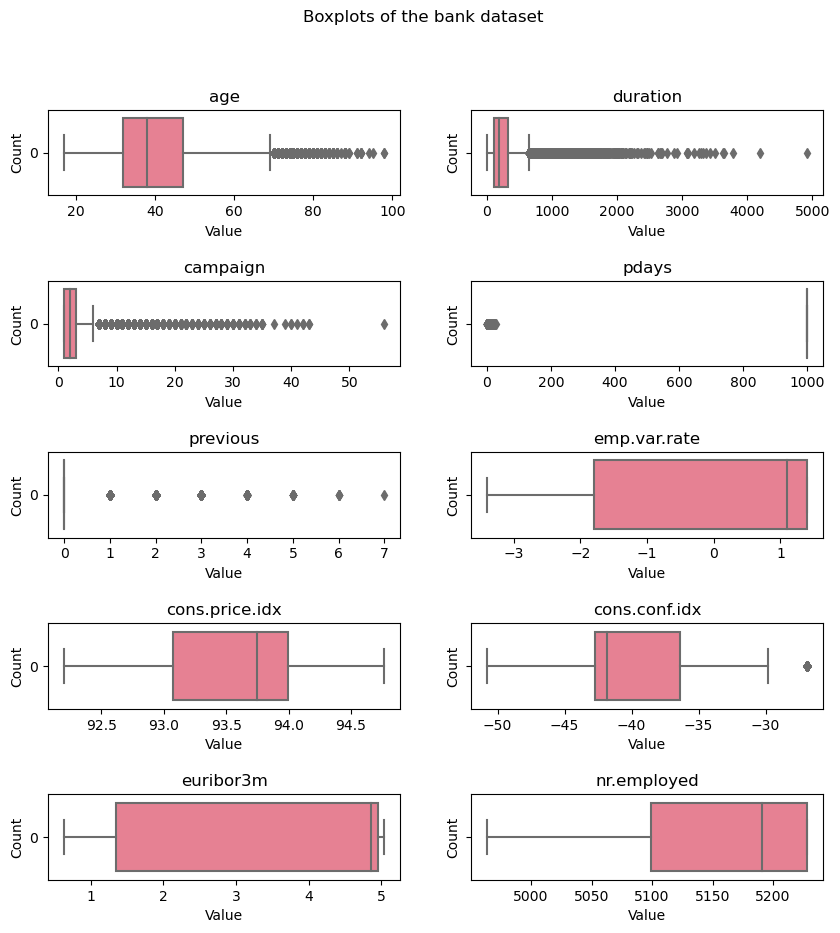

In [6]:
col_list = list(bank_dataset.columns)
# create a figure and a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10), sharey=True)
# adjust the spacing between the subplots
fig.subplots_adjust(hspace=1, wspace=0.2)

# loop over the columns and plot the boxplots on each subplot
i = 0
for col in col_list:
    if ((bank_dataset[col].dtype=='int64')or(bank_dataset[col].dtype=='float64')):
        # get the row and column index of the subplot from the loop index
        row = i // 2
        column = i % 2
        # plot the boxplot on the subplot with patch_artist=True and a color palette
        sns.boxplot(bank_dataset[col], orient='h', ax=axes[row, column], palette='husl')
        # set the title and label of the subplot
        axes[row, column].set_title(col)
        axes[row, column].set_xlabel('Value')
        axes[row, column].set_ylabel('Count')
        # remove the inner labels of the grid
#         axes[row, column].label_outer()
        i +=1
    
# set the title of the figure
fig.suptitle('Boxplots of the bank dataset')
# show the figure
plt.show()

In [7]:
bank_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# bank_dataset.describe().to_excel("numerical describe.xlsx", header=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

Text(0.5, 0.98, 'The Pairplot of Age, Duration and Campaign by y')

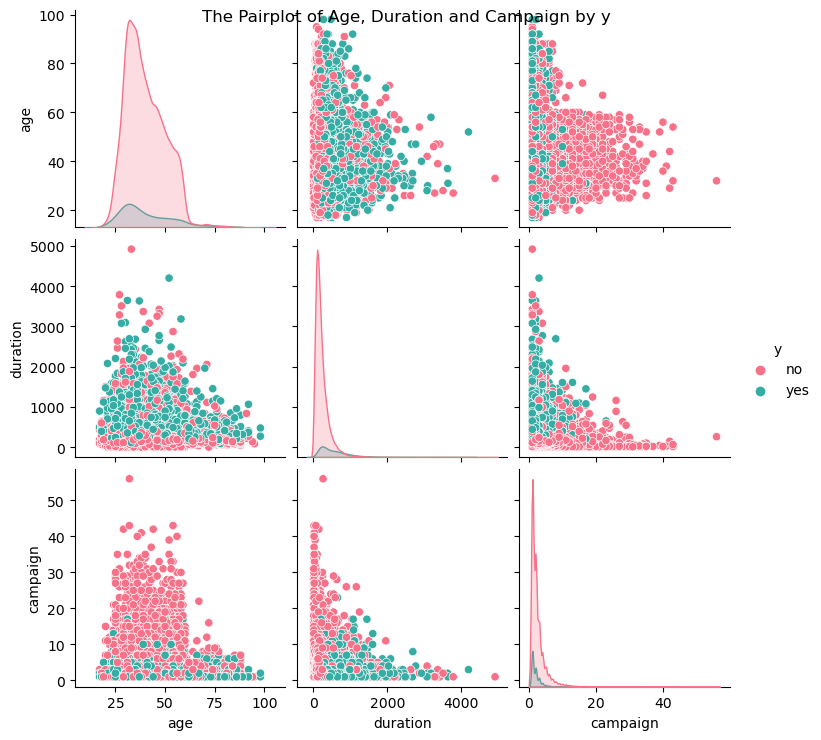

In [9]:
# Create a pairplot
sns.pairplot(bank_dataset[['age', 'duration','campaign', 'y']], hue='y', palette='husl')

# Add a title
plt.suptitle('The Pairplot of Age, Duration and Campaign by y')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

Text(0.5, 0.98, 'The Pairplot of cons.price.idx, cons.conf.idx, euribor3m, nr.employed by y')

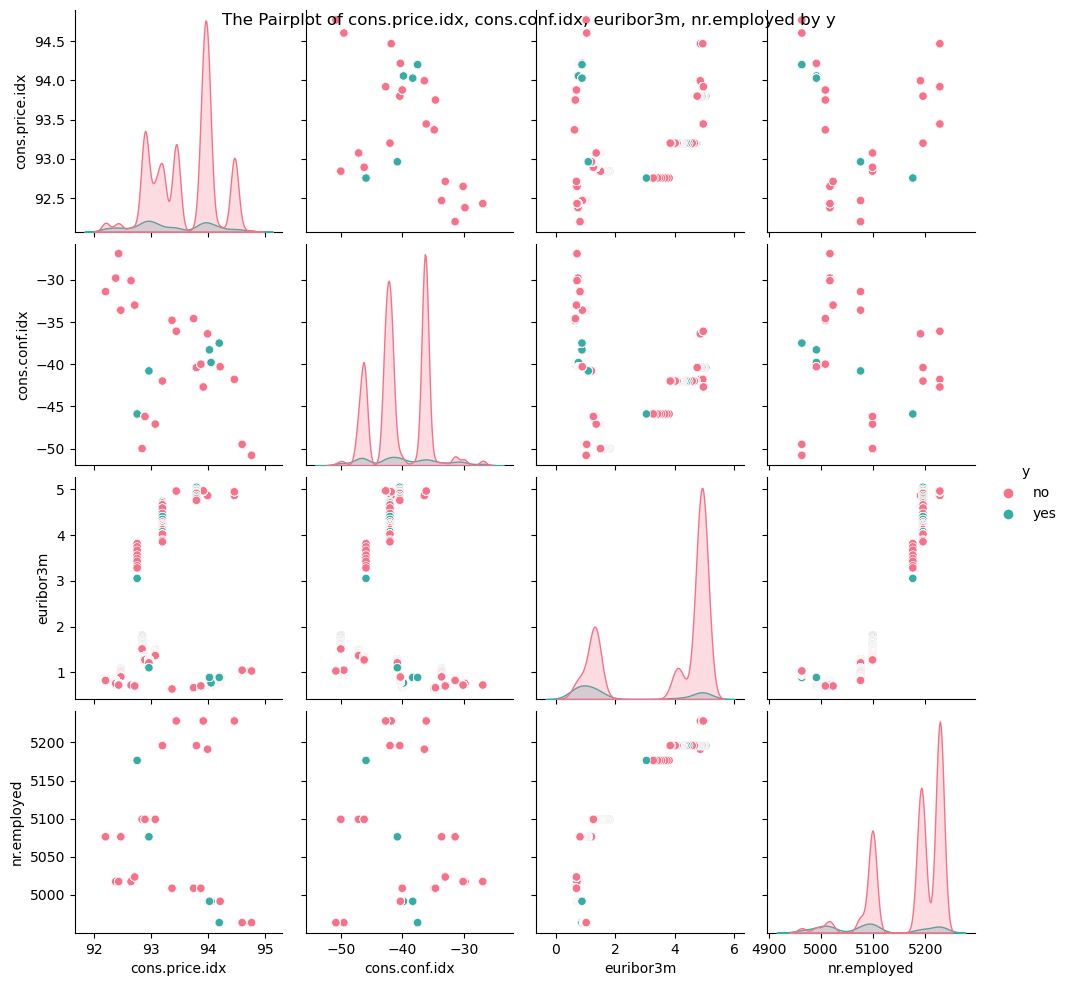

In [12]:
# Create a pairplot
sns.pairplot(bank_dataset[['cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']], hue='y', palette='husl')

# Add a title
plt.suptitle('The Pairplot of cons.price.idx, cons.conf.idx, euribor3m, nr.employed by y')

In [23]:
# This function check 'unknown' and 'other' values in dataframe
# Default has more than 20% unknown values. We shall delve further to correct this anomaly
# Other variables have less than 5% unknown values

def unknown_values(bank_dataset):
    unknown_val = []
    for i in list(bank_dataset.columns):
        
        gh = len(bank_dataset[bank_dataset[i]=='unknown']) #count unknow values
        
        if (gh>0):
            unknown_val.append({
                'Column': i,
                'Total Records': len(bank_dataset),
                'Unknown': gh,
                '% Unknown': str(np.round((gh/(len(bank_dataset))),2)*100)+"%",
            })
            
    unknown_val = pd.DataFrame(unknown_val)
    return unknown_val

unknown_values = unknown_values(bank_dataset)
unknown_values
# unknown_values.to_excel("% unknown in the dataset.xlsx", header=True)

,Column,Total Records,Unknown,% Unknown
0,job,41188,330,1.0%
1,marital,41188,80,0.0%
2,education,41188,1731,4.0%
3,default,41188,8597,21.0%
4,housing,41188,990,2.0%
5,loan,41188,990,2.0%


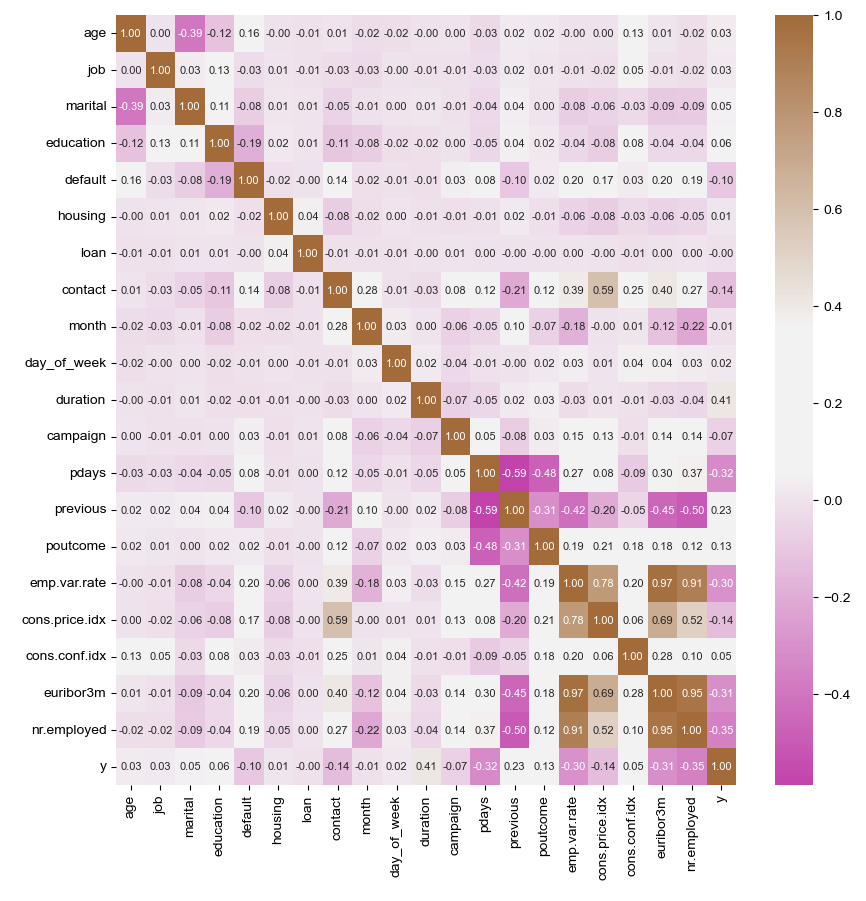

In [121]:
bank_data_for_cor = bank_dataset.copy()
# bank_data_for_cor = bank_data_for_cor.drop(['marital', 'education',
#                                               'default','housing','loan','contact','poutcome'], axis=1)

# encoding categorical columns to perform correlation matrix
# Select the columns to encode
cols_to_encode = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome',
                 'job', 'month','day_of_week','y']

from sklearn.preprocessing import LabelEncoder
# Apply the LabelEncoder function to the selected columns
le = LabelEncoder()
bank_data_for_cor[cols_to_encode] = bank_data_for_cor[cols_to_encode].apply(lambda col: le.fit_transform(col))
# plot heatmap of covariance matrix 

# Create a heatmap of the correlation matrix
cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
plt.figure(figsize=(10,10))
sns.heatmap(bank_data_for_cor.corr(), annot=True, cmap=cmap, fmt='.2f', annot_kws={'fontsize':8})

# Set the theme
sns.set_theme()

# Show the plot
plt.show()

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
            'euribor3m','nr.employed']
X = bank_data_for_cor[col_list]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

,Features,VIF
0,const,528669.824458
1,age,1.018879
2,duration,1.009454
3,campaign,1.038426
4,pdays,1.614851
5,previous,1.796659
6,emp.var.rate,33.070187
7,cons.price.idx,6.338250
8,cons.conf.idx,2.649719
9,euribor3m,64.350349


### Checking distribution and countplot of categorical variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


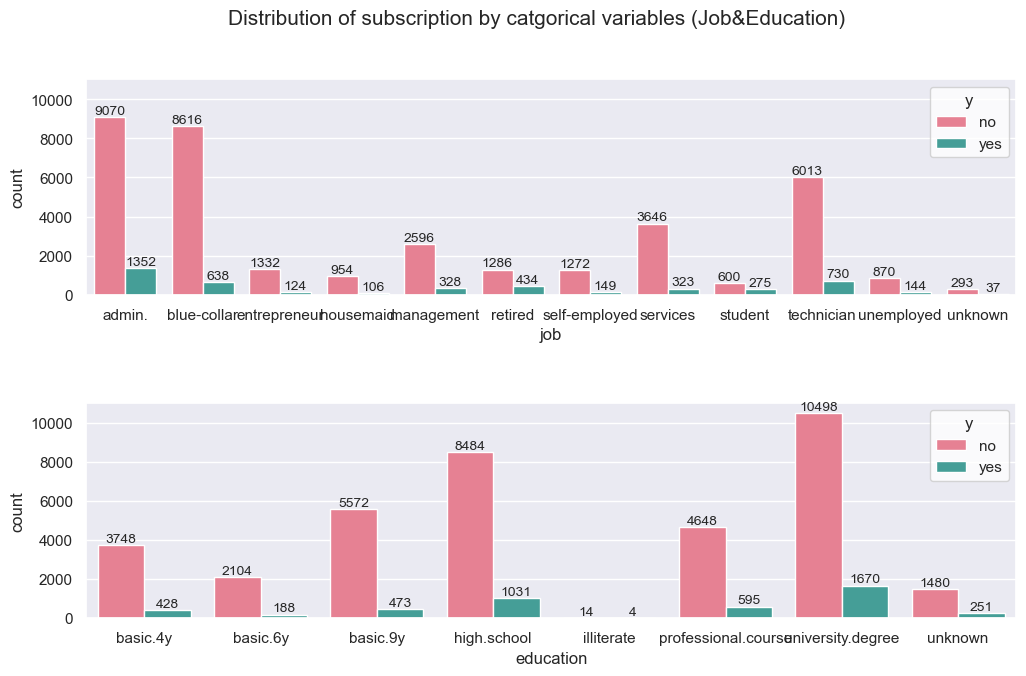

In [26]:
# create a figure and a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,7), sharey=True)
# adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.2)
col_list = ['job','education']
# col_list = list(bank_dataset.columns)
# plot a countplot on each subplot
i = 0
sns.set_style('whitegrid')

for col in col_list:
    if (bank_dataset[col].dtype=='category'):
        # get the row and column index of the subplot from the loop index
        row = i // 1
        column = i % 1
        # plot the countplot on the subplot with a color palette
        ax = sns.countplot(x=col, hue='y', data=bank_dataset, palette='husl', ax=axes[row])
        # set the title and label of the subplot
#         axes[row, column].set_title(col)
#         axes[row, column].set_xlabel('Value')
#         axes[row, column].set_ylabel('Count')
        # remove the inner labels of the grid
#         axes[row, column].label_outer()
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=10)
        i += 1

# remove the last subplot
# axes[4, 1].remove()
# set the title of the figure
fig.suptitle('Distribution of subscription by catgorical variables (Job&Education)', fontsize=15)
# show the figure
plt.show()

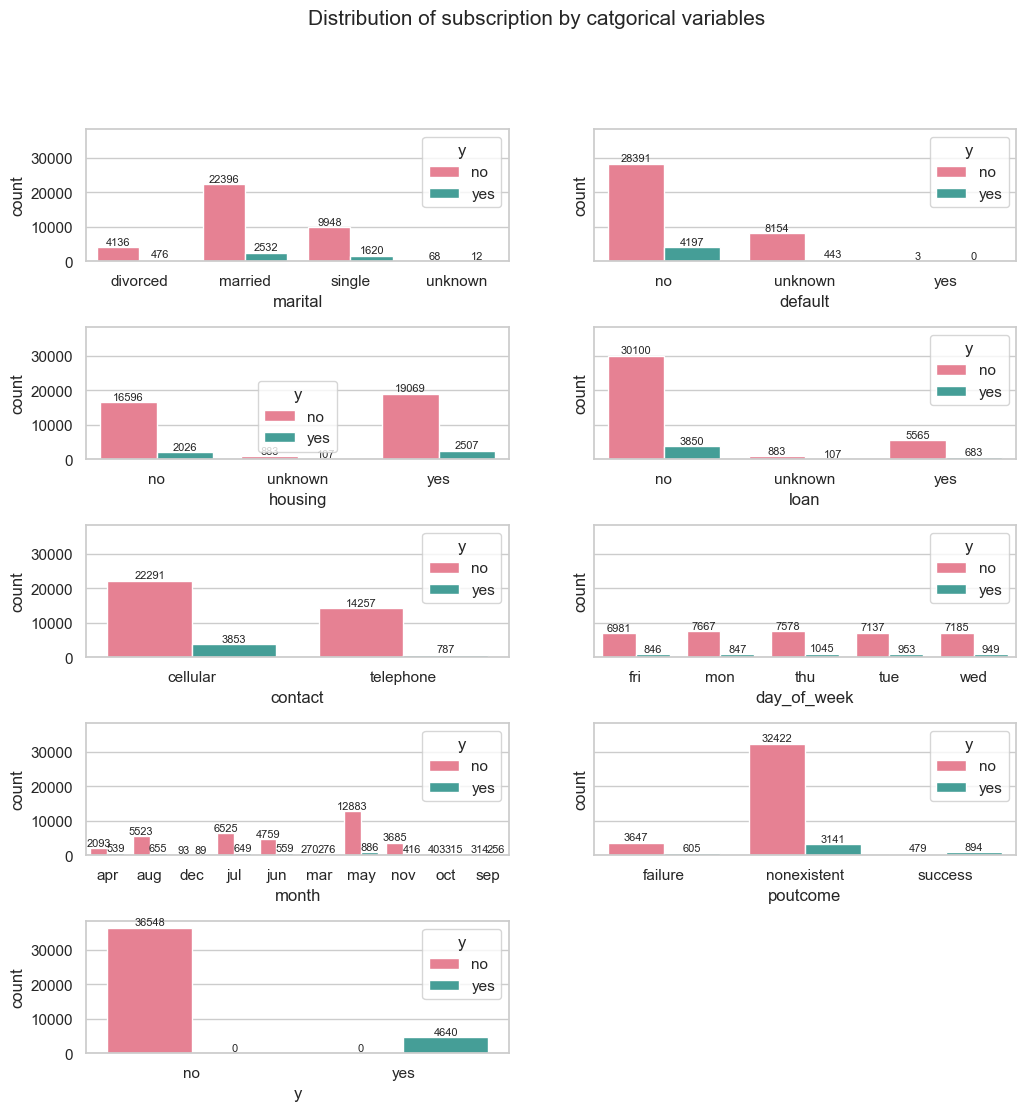

In [27]:
# create a figure and a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,12), sharey=True)
# adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.2)
col_list = ['marital','default', 'housing', 'loan','contact', 'day_of_week','month','poutcome','y']
# plot a countplot on each subplot
i = 0
sns.set_style('whitegrid')

for col in col_list:
    if (bank_dataset[col].dtype=='category'):
        # get the row and column index of the subplot from the loop index
        row = i // 2
        column = i % 2
        # plot the countplot on the subplot with a color palette
        ax = sns.countplot(x=col, hue='y', data=bank_dataset, palette='husl', ax=axes[row,column])
        # set the title and label of the subplot
#         axes[row, column].set_title(col)
#         axes[row, column].set_xlabel('Value')
#         axes[row, column].set_ylabel('Count')
        # remove the inner labels of the grid
#         axes[row, column].label_outer()
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=8)
        i += 1

# remove the last subplot
axes[4, 1].remove()
# set the title of the figure
fig.suptitle('Distribution of subscription by catgorical variables', fontsize=15)
# show the figure
plt.show()

## Handling Outliers

In [109]:
# a safepoint
bank_df = bank_dataset.copy()

In [110]:
Q1 = bank_df['age'].quantile(0.25)
Q3 = bank_df['age'].quantile(0.75)
Q1+2*(Q3-Q1)

In [112]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[(df[col_name] >= Q1 - 1.5 * IQR) & (df[col_name] <= Q3 + 1.5 * IQR)]
    return df_filtered

col_names = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

for col_name in col_names:
    bank_df = remove_outliers(bank_df, col_name)

In [113]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30360.000000,30360.000000,30360.000000,30360.0,30360.0,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000
mean,39.671080,204.932576,2.081555,999.0,0.0,0.388261,93.646458,-40.410119,3.970239,5181.932372
std,9.480333,140.214267,1.302700,0.0,0.0,1.418314,0.538624,4.164977,1.556323,60.639498
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,100.000000,1.000000,999.0,0.0,-0.100000,93.200000,-42.700000,4.021000,5191.000000
50%,38.000000,167.000000,2.000000,999.0,0.0,1.100000,93.918000,-41.800000,4.859000,5195.800000
75%,47.000000,277.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,69.000000,644.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


Now after removing outliers, **pdays** which stands for number of days that passed by after the client was last contacted from a previous campaign and **previous** which stands for number of contacts performed before this campaign are literally just 1 value. For **pdays**, it's 999 days and for **previous**, it's 0 only. So this two variables do not contribute to the model at all. Thus we should just delete them.

In [114]:
data_make_sense = bank_df.drop(['pdays','previous'], axis=1)

## Handling multicolinarity

In [115]:
data_no_multicolinarity = data_make_sense.drop(['cons.price.idx','emp.var.rate','euribor3m','nr.employed'], axis=1)

## One-hot Encoding categorical variables

Categorical variables will be encoded by one-hot encoding method (including the target 'y': {yes, no} to {0,1})

default, housing, and loan are binary categorical variables but contain missing values denoted as 'unknown' and 
the unknown values are going to be used as another category of these variables. As a result, these columns are not
binary anymore, we are not going to use one-hot encoding for them as well.

In [116]:
# Select the columns to encode
cols_to_encode = ['job','marital','education','default','housing', 'loan',
                  'contact','month','day_of_week','poutcome']
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
df_with_dummies = pd.get_dummies(data_no_multicolinarity, columns=cols_to_encode, drop_first=True, dtype=int)
df_with_dummies.columns

Index(['age', 'duration', 'campaign', 'cons.conf.idx', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Encode y value ***{yes, no} as {1,0}***

In [117]:
# Encode y value {yes, no} as {1,0}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_with_dummies['y'] = le.fit_transform(df_with_dummies['y'])
df_with_dummies.head()

,age,duration,campaign,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,-36.4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,-36.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [118]:
cols_reordered = ['y','age', 'duration', 'campaign', 'cons.conf.idx','job_blue-collar', 
       'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown','default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown','loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
df_preprocessed = df_with_dummies[cols_reordered]
df_preprocessed.head(5)

,y,age,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,56,261,1,-36.4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,57,149,1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,37,226,1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,40,151,1,-36.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,56,307,1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [119]:
df_preprocessed.to_csv("Modelling/bank_data_preprocessed.csv", header=True, index=False)